In [ ]:
from nbdev.showdoc import *
import numpy as np
from diffusion_curvature.core import plot_3d
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 03 Ground Truth Comparisons
Here we benchmark diffusion curvature on a battery of toy datasets, and compare with the ground truth gaussian curvature.
The follow-up notebooks in this series include

03a. Hyperboloid Tests, including a parameter ablation

03b. Average Transition Probability curvature -- an upgrade of diffusion curvature developed by Prof. Ian Adelstein, now enabled by default in diffusion curvature. This notebook benchmarks that version specifically.

03c. Absolute Curvature Testing compares the diffusion curvature across a series of polar caps of decreasing curvature, demonstrating a direct relationship between gaussian curvature and diffusion curvature

In [ ]:
from diffusion_curvature.datasets import torus, ellipsoid, hyperboloid
from diffusion_curvature.core import DiffusionMatrix
from diffusion_curvature import laziness

In [ ]:
X, ks = hyperboloid(n=5000)
P = DiffusionMatrix(X,kernel_type="anisotropic",k=10)

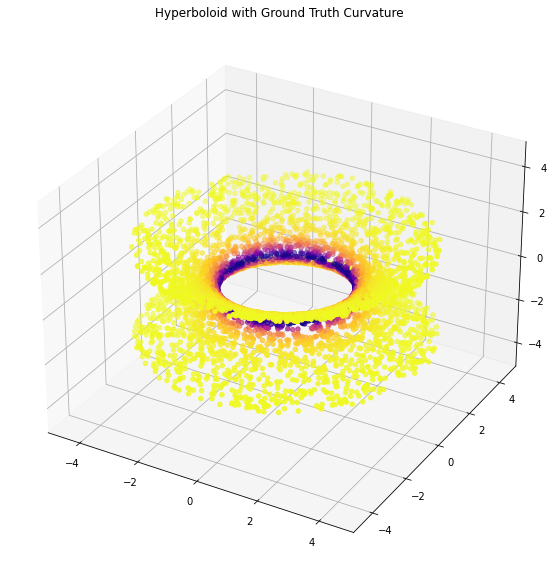

In [ ]:
plot_3d(X,ks,"Hyperboloid with Ground Truth Curvature")

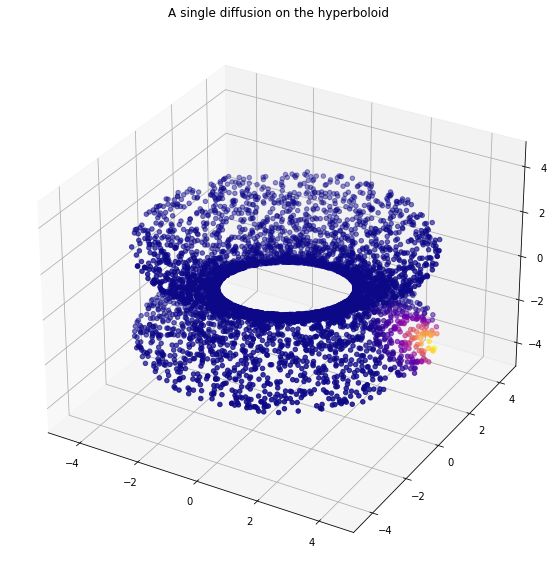

In [ ]:
plot_3d(X,P[50],title="A single diffusion on the hyperboloid")

In [ ]:
ls, ds = laziness.curvature(P,diffusion_powers=1,aperture=20,smoothing=1, return_density = True)

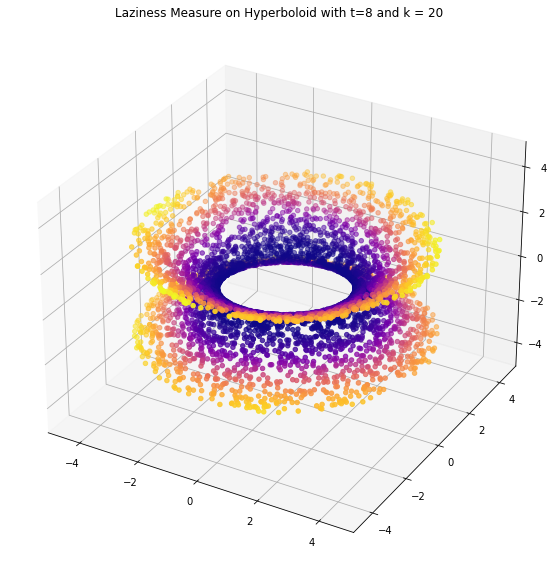

In [ ]:
plot_3d(X,ls,"Laziness Measure on Hyperboloid with t=8 and k = 20",colorbar=True)

In [ ]:
ls

array([0.21506473, 0.52855716, 0.04341855, ..., 0.04312584, 0.01058688,
       0.21531332])

In [ ]:
scaled_ls = (ls - min(ls))
scaled_ls = scaled_ls / max(scaled_ls)

In [ ]:
scaled_ls

array([0.31014943, 0.77784233, 0.05407404, ..., 0.05363736, 0.00509314,
       0.31052031])

In [ ]:
ks

array([-0.04794957, -0.00560801, -0.23174509, ..., -0.28818852,
       -1.58922312, -0.02892189])

# Torus

In [ ]:
X, ks = torus(n=5000,seed=105)
P = DiffusionMatrix(X,kernel_type="anisotropic",k=10)
# compute curvature

In [ ]:
ls, ds = laziness.curvature(P,diffusion_powers=8,aperture=20,smoothing=1, dynamically_adjusting_neighborhood=True, return_density = True)

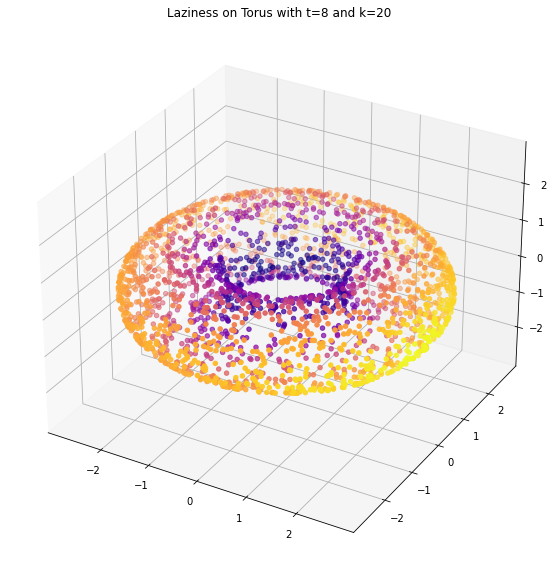

In [ ]:
plot_3d(X,ls,use_plotly=False,title="Laziness on Torus with t=8 and k=20")

# Ellipsoid

In [ ]:
X, ks = ellipsoid(n=5000)
P = DiffusionMatrix(X,kernel_type="anisotropic",k=10)

In [ ]:
ls, ds = laziness.curvature(P,diffusion_powers=8,aperture=10,smoothing=1, dynamically_adjusting_neighborhood=True, return_density = True)

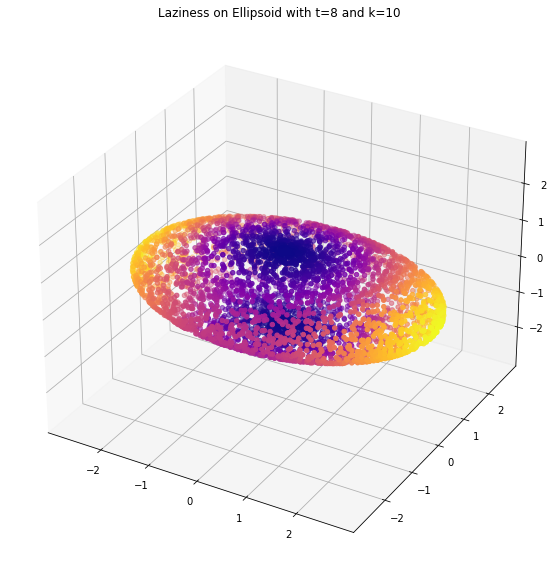

In [ ]:
plot_3d(X, ls, "Laziness on Ellipsoid with t=8 and k=10")